In [1]:
import os
import sys
main_path = 'e:\\ehz'
sys.path.append(main_path)
os.chdir(main_path)

import pandas as pd
import numpy as np
import utils

fast calcul of bond delta with respect to zero coupon rates

deduce delta hedge using swaps

simulate swap hedge pnl

best case : 
decompose pnl to delta; gamma ; bond theta ; repo; z spread

In [13]:
bonds = utils.get_bonds() 
P = utils.get_bond_prices(ptype='mid')
zc = utils.get_zc_rates(source='bloom')
Z =utils.get_bonds_zspread()
bond_perf = utils.get_bond_perfs()

In [3]:
roll_in_dates = utils.roll_in_dates
ctd_tabs = utils.get_ctd_tabs()
otr_tabs = utils.get_otr_tabs()
compact_ctd_tabs = ctd_tabs.copy()
dates = P.loc[roll_in_dates.loc[ctd_tabs.index[0]]:].index
ctd_tabs = pd.DataFrame(index = dates, columns = compact_ctd_tabs.columns)
ctd_tabs = ctd_tabs.apply(lambda x: compact_ctd_tabs.loc[utils.futs_calendar.loc[x.name]], axis=1)
active_bonds = pd.concat([otr_tabs, ctd_tabs], axis=1)

In [4]:
from numpy import float16


pyd = utils.get_bonds_pyd()
C_index = pd.date_range(pyd.min(), pyd.max())
C_columns = bonds.index
C = pd.DataFrame(index = C_index, columns=C_columns, data=0, dtype=float16)
for cusip in bonds.index : 
    coupon = bonds.loc[cusip, 'coupon']
    payment_date = pyd.loc[cusip].values
    C.loc[payment_date] = coupon/2
    T = payment_date[-1]
    C.loc[T] += 100

In [9]:
date = C.index[10000]
set_date = utils.add_business_day(date, 1)
w = np.random.randn(len(bonds))
result_cashflow = (C[C.index > set_date]@w)
zc_date = zc.loc[date]
T = zc_date.index/360

on a un vecteur de future payments. 
mtm of bond at time t is cashflows ti > (t+1)

mtm(ti-2)  cashflows t > ti-1
mtm(ti-1)  cashflows t > ti

$$ pnl = \sum_{tj>ti} c_j*(zc_{t_i-1} - zc_{t_i-2})  -  c_i*zc_{t_i-2}^{t_i} + c_i*zc_{t_i-1}^{t_i} $$

pnl is correct when passing a payment date

$$ zc\_bond = (1+r+z)^{-dt}; dzc\_bond/dr = -dt.(1+r+z)^{-dt-1} $$

<Axes: >

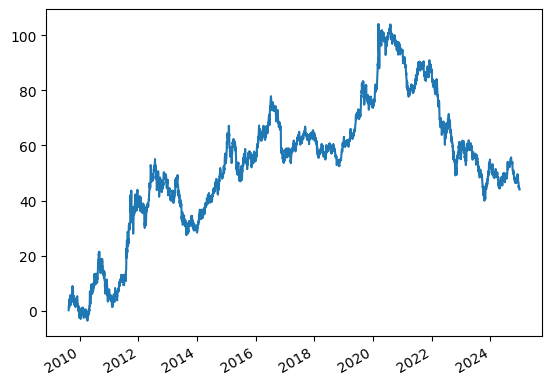

In [17]:
cusip = '912810QC'
bond_perf[cusip].cumsum().plot()

In [ ]:
set_date = utils.add_business_day(date,1)
cashflow = C[C.index > set_date]
z = 

Timestamp('2017-07-03 00:00:00')

In [ ]:

delta_zc = T*zc 
delta_zc

,0,1,2,3,4,5,6,7,8,9,...,12765,12766,12767,12768,12769,12770,12771,12772,12773,12774
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-22,0.0,0.002778,0.005555,0.008332,0.011109,0.013886,0.016662,0.019438,0.022214,0.024990,...,7.174850,7.174534,7.174219,7.173903,7.173589,7.173273,7.172958,7.172643,7.172328,7.172013
2008-09-23,0.0,0.002778,0.005555,0.008332,0.011109,0.013886,0.016662,0.019439,0.022215,0.024990,...,7.265047,7.264745,7.264443,7.264141,7.263840,7.263538,7.263237,7.262935,7.262634,7.262332
2008-09-24,0.0,0.002778,0.005555,0.008332,0.011110,0.013886,0.016663,0.019439,0.022216,0.024991,...,7.078565,7.078181,7.077798,7.077414,7.077031,7.076647,7.076263,7.075880,7.075496,7.075112
2008-09-25,0.0,0.002778,0.005555,0.008333,0.011110,0.013887,0.016663,0.019440,0.022216,0.024992,...,7.366630,7.366198,7.365766,7.365334,7.364901,7.364469,7.364036,7.363603,7.363169,7.362736
2008-09-26,0.0,0.002778,0.005555,0.008333,0.011110,0.013887,0.016664,0.019440,0.022216,0.024992,...,7.488295,7.487942,7.487589,7.487235,7.486882,7.486528,7.486174,7.485820,7.485467,7.485113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-13,0.0,0.002777,0.005554,0.008330,0.011106,0.013881,0.016655,0.019428,0.022201,0.024973,...,9.918262,9.918259,9.918255,9.918251,9.918248,9.918244,9.918241,9.918237,9.918233,9.918230
2025-03-14,0.0,0.002777,0.005554,0.008330,0.011106,0.013881,0.016655,0.019428,0.022201,0.024973,...,9.794403,9.794394,9.794385,9.794375,9.794367,9.794357,9.794348,9.794337,9.794328,9.794319
2025-03-17,0.0,0.002777,0.005554,0.008330,0.011106,0.013881,0.016655,0.019428,0.022201,0.024973,...,9.876702,9.876701,9.876701,9.876701,9.876701,9.876699,9.876699,9.876698,9.876697,9.876698
